In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ken-jee-youtube-data/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv
/kaggle/input/ken-jee-youtube-data/All_Comments_Final.csv
/kaggle/input/ken-jee-youtube-data/Aggregated_Metrics_By_Video.csv
/kaggle/input/ken-jee-youtube-data/Video_Performance_Over_Time.csv


In [2]:
# Read Youtube Metric data
metric_data = '../input/ken-jee-youtube-data/Aggregated_Metrics_By_Video.csv'
df = pd.read_csv(metric_data)
df.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


In [3]:
# drop the first two rows because they are irrelevant for our analysis 
df.drop([0,1], axis = 0, inplace = True)
df.reset_index(drop = True , inplace = True)
df.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,220.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000
mean,59.855856,135.387387,13.333333,802.135135,11.288288,378.675676,4.429676,11.433964,34.109414,19434.409910,1133.992447,367.387387,95.081982,3.353656e+05,3.083559
std,72.030266,371.671269,31.276416,1812.647270,15.462339,1097.253743,1.791702,3.348437,15.177676,34719.189729,2078.429338,1085.593594,173.948341,6.387680e+05,1.677978
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,162.500000,2.000000,27.000000,3.218250,9.375000,23.427500,3926.000000,176.953975,19.250000,12.082750,9.840900e+04,1.915000
50%,37.000000,46.000000,4.000000,339.500000,7.000000,67.500000,4.334000,11.144000,35.120000,8221.500000,391.651800,62.000000,32.468000,1.537465e+05,2.890000
75%,65.750000,111.000000,11.000000,706.750000,14.000000,226.500000,5.354000,12.912250,43.507500,18225.750000,1099.989425,225.250000,87.484500,2.714405e+05,3.985000
max,412.000000,4694.000000,253.000000,19464.000000,131.000000,10734.000000,10.387000,37.786000,76.600000,297222.000000,17039.656600,10603.000000,1217.046000,5.447045e+06,11.510000


In [4]:
df.describe()
# we are interested in using the shares and the views to predict the likes on videos using Linear Regression analysis 

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,220.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000
mean,59.855856,135.387387,13.333333,802.135135,11.288288,378.675676,4.429676,11.433964,34.109414,19434.409910,1133.992447,367.387387,95.081982,3.353656e+05,3.083559
std,72.030266,371.671269,31.276416,1812.647270,15.462339,1097.253743,1.791702,3.348437,15.177676,34719.189729,2078.429338,1085.593594,173.948341,6.387680e+05,1.677978
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,162.500000,2.000000,27.000000,3.218250,9.375000,23.427500,3926.000000,176.953975,19.250000,12.082750,9.840900e+04,1.915000
50%,37.000000,46.000000,4.000000,339.500000,7.000000,67.500000,4.334000,11.144000,35.120000,8221.500000,391.651800,62.000000,32.468000,1.537465e+05,2.890000
75%,65.750000,111.000000,11.000000,706.750000,14.000000,226.500000,5.354000,12.912250,43.507500,18225.750000,1099.989425,225.250000,87.484500,2.714405e+05,3.985000
max,412.000000,4694.000000,253.000000,19464.000000,131.000000,10734.000000,10.387000,37.786000,76.600000,297222.000000,17039.656600,10603.000000,1217.046000,5.447045e+06,11.510000


In [5]:
# DEALING WITH MISSING VALUES- with this we have confirmed that there are no missing values in the columns we are interested in 
df.isnull().sum()

Video                                   0
Video title                             0
Video pub­lish time                     0
Com­ments ad­ded                        0
Shares                                  0
Dis­likes                               0
Likes                                   0
Sub­scribers lost                       0
Sub­scribers gained                     0
RPM (USD)                               0
CPM (USD)                               2
Av­er­age per­cent­age viewed (%)       0
Av­er­age view dur­a­tion               0
Views                                   0
Watch time (hours)                      0
Sub­scribers                            0
Your es­tim­ated rev­en­ue (USD)        0
Im­pres­sions                           0
Im­pres­sions click-through rate (%)    0
dtype: int64

### Now we will explore the Probability Distribution Functions of the variable- The reason for doing this is to identify outliers and confirm if we are dealing with a normal distribution or not 


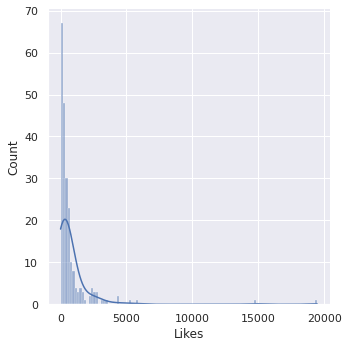

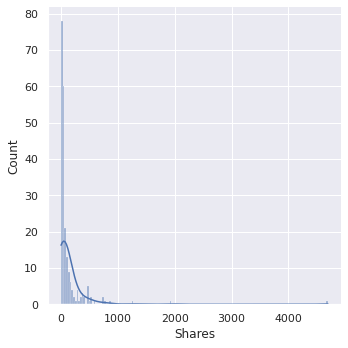

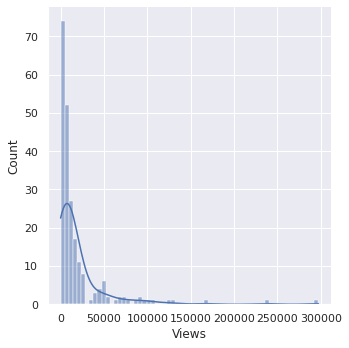

In [6]:
sns.displot(df['Likes'], kde=True)
sns.displot(df['Shares'], kde=True)
sns.displot(df['Views'], kde=True)

# we are unable to properly visualize the distribution of the data because of the outliers, we can identify these outliers using boxplots
# from the plots we can see that we are dealing with exponential data

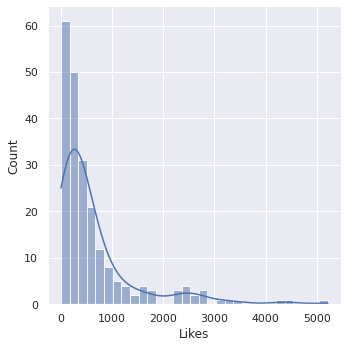

In [7]:
# we will try to eliminate the outliers by removing the top 1% in the data using the quantile method 
q = df['Likes'].quantile(0.99)
data_1 = df[df['Likes']<q]
sns.displot(data_1['Likes'],kde=True)

### Lets do the same thing for the views and the shares column

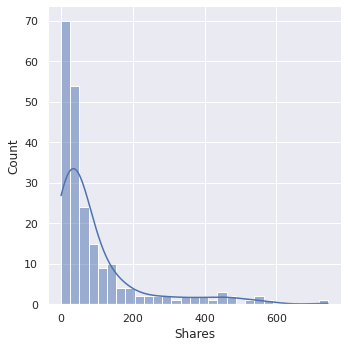

In [8]:
q = data_1['Shares'].quantile(0.99)
data_2 = data_1[data_1['Shares']<q]
sns.displot(data_2['Shares'],kde=True)

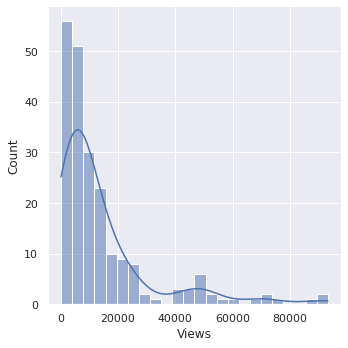

In [9]:
q = data_2['Views'].quantile(0.99)
data_3 = data_2[data_2['Views']<q]
sns.displot(data_3['Views'],kde=True)

In [10]:
#reset the index
data_cleaned = data_3.reset_index(drop=True)


In [11]:
data_cleaned.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,211.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000
mean,54.812207,86.661972,10.563380,541.713615,9.075117,217.286385,4.404155,11.411782,34.138169,13931.338028,839.336238,208.211268,69.025840,2.683179e+05,3.013991
std,67.870176,118.722080,27.640925,635.758125,9.533159,401.187045,1.805025,3.389116,15.408304,17509.236915,1306.548898,396.259001,108.509929,5.081239e+05,1.647865
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,17.000000,17.000000,1.000000,157.000000,2.000000,25.000000,3.204000,9.373000,23.140000,3673.000000,172.302300,19.000000,11.996000,9.747600e+04,1.900000
50%,36.000000,42.000000,4.000000,309.000000,6.000000,65.000000,4.334000,11.016000,34.980000,7705.000000,368.281600,58.000000,30.787000,1.486290e+05,2.730000
75%,62.000000,91.000000,9.000000,637.000000,13.000000,195.000000,5.326000,12.898000,44.130000,15398.000000,922.037700,188.000000,64.756000,2.424130e+05,3.910000
max,412.000000,584.000000,253.000000,3530.000000,53.000000,2395.000000,10.387000,37.786000,76.600000,93329.000000,9057.275200,2362.000000,767.493000,5.447045e+06,11.510000


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Shares','Sub­scribers','Views','Im­pres­sions']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

# this was just put here to test the vif between the variables, in order to see what variables can be used for the prediction
# from the values we've gotten it seems that views is too correlated with the other variables and it wont be advisable to use it for the model

,VIF,Features
0,5.371581,Shares
1,5.132663,Sub­scribers
2,8.589122,Views
3,2.250847,Im­pres­sions


In [13]:
print(np.where(data_cleaned['Shares'] == 0))

(array([209]),)


In [14]:
# dropping the row in that has a shares value of 0
data_cleaned.drop([209], axis = 0, inplace = True)
data_cleaned.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,210.000000,212.000000,212.000000,212.000000,212.000000,212.000000,2.120000e+02,212.000000
mean,55.056604,87.070755,10.613208,544.061321,9.117925,218.287736,4.409014,11.391857,34.022689,13994.466981,843.204451,209.169811,69.342712,2.694808e+05,3.020613
std,67.936802,118.852729,27.696757,636.336717,9.535181,401.869703,1.807900,3.384804,15.352102,17526.364350,1308.418192,396.949290,108.667932,5.090423e+05,1.648921
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,60.000000,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,17.000000,17.000000,1.000000,158.500000,2.000000,25.750000,3.202500,9.371000,23.130000,3701.500000,173.552625,19.000000,12.005750,9.776700e+04,1.907500
50%,36.000000,42.500000,4.000000,314.000000,6.000000,65.000000,4.334500,11.010500,34.980000,7785.000000,368.378750,58.500000,30.914000,1.492365e+05,2.755000
75%,62.000000,91.500000,9.250000,637.250000,13.000000,195.750000,5.335000,12.883500,43.845000,15490.000000,930.509400,188.000000,66.302250,2.426685e+05,3.920000
max,412.000000,584.000000,253.000000,3530.000000,53.000000,2395.000000,10.387000,37.786000,76.600000,93329.000000,9057.275200,2362.000000,767.493000,5.447045e+06,11.510000


### Now we want to check for the different OLS assumptions, we will be focusing on Linearity and Multicollinearity 

<Figure size 864x360 with 0 Axes>

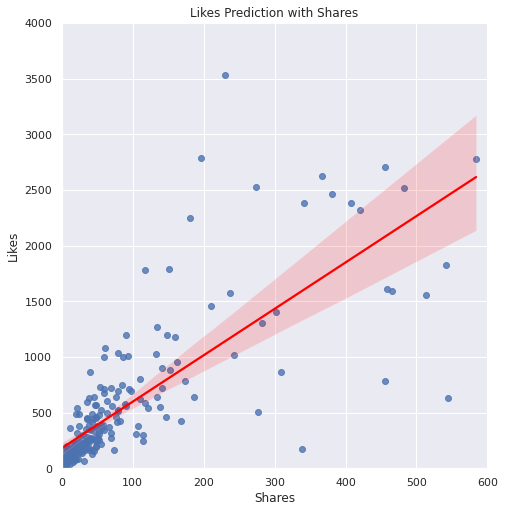

<Figure size 864x432 with 0 Axes>

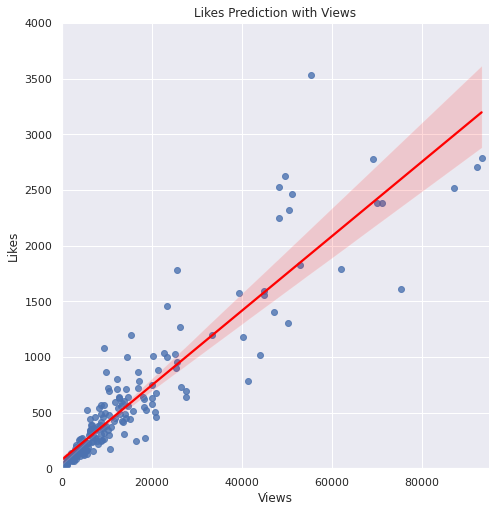

In [15]:
# LINEARITY - To check for linearity we have to plot the dependent variable against the independent variable on the scatter plot 
plt.figure(figsize=(12,5))
sns.pairplot(data_cleaned,x_vars=["Shares"], y_vars=["Likes"], height=7, kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.title('Likes Prediction with Shares')
plt.ylim(0, 4000)
plt.xlim(0, 600)
plt.show()

plt.figure(figsize=(12,6))
sns.pairplot(data_cleaned,x_vars=["Views"], y_vars=["Likes"], height=7, kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Likes Prediction with Views')
plt.ylim(0, 4000)
plt.xlim(0, 95000)
plt.show()



### Now we will apply a log transformation on the data but before we do that we will select just the columns we need 

In [16]:
data = data_cleaned.copy()

new_data = data[['Shares', 'Likes', 'Views']]
new_data.describe()

,Shares,Likes,Views
count,212.000000,212.000000,212.000000
mean,87.070755,544.061321,13994.466981
std,118.852729,636.336717,17526.364350
min,1.000000,1.000000,60.000000
25%,17.000000,158.500000,3701.500000
50%,42.500000,314.000000,7785.000000
75%,91.500000,637.250000,15490.000000
max,584.000000,3530.000000,93329.000000


In [17]:
new_data['log_shares'] = np.log(new_data['Shares'])
new_data['log_likes'] = np.log(new_data['Likes'])
new_data['log_views'] = np.log(new_data['Views'])
new_data.describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Shares,Likes,Views,log_shares,log_likes,log_views
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,87.070755,544.061321,13994.466981,3.692665,5.724758,8.923183
std,118.852729,636.336717,17526.364350,1.340896,1.153854,1.178115
min,1.000000,1.000000,60.000000,0.000000,0.000000,4.094345
25%,17.000000,158.500000,3701.500000,2.833213,5.065740,8.216484
50%,42.500000,314.000000,7785.000000,3.749435,5.749266,8.959901
75%,91.500000,637.250000,15490.000000,4.516295,6.457162,9.647897
max,584.000000,3530.000000,93329.000000,6.369901,8.169053,11.443886


<Figure size 864x360 with 0 Axes>

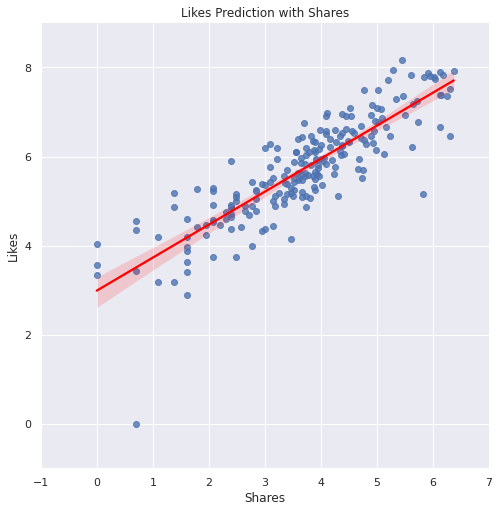

<Figure size 864x360 with 0 Axes>

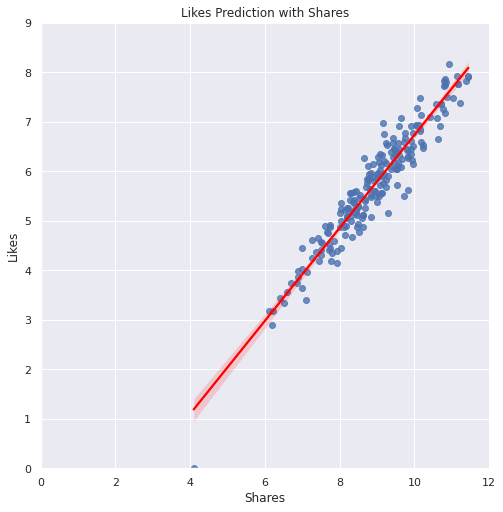

In [18]:
plt.figure(figsize=(12,5))
sns.pairplot(new_data,x_vars=["log_shares"], y_vars=["log_likes"], height=7, kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.title('Likes Prediction with Shares')
plt.ylim(-1, 9)
plt.xlim(-1, 7)
plt.show()

plt.figure(figsize=(12,5))
sns.pairplot(new_data,x_vars=["log_views"], y_vars=["log_likes"], height=7, kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.xlabel('Shares')
plt.ylabel('Likes')
plt.title('Likes Prediction with Shares')
plt.ylim(0, 9)
plt.xlim(0, 12)
plt.show()

### Now lets look at Multicollinearity - We will use stats model to check for multicollinearity through the use of the variance Inflation factor 

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = new_data[['Shares', 'Views']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

# from the results we can see that shares and views are equally correlated,
# because of their high correlation it means that almost all the information given by one of them 
# is included in the information given by the other meaning that it would make more sense to use another variable such as impressions or 
# subscribers to predict the likes.

,VIF,Features
0,5.013214,Shares
1,5.013214,Views


### CREATE THE REGRESSION MODEL 

In [20]:
targets = new_data['log_likes']
inputs = new_data[['log_shares','log_views']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [22]:
# Create the regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [23]:
# To get the predicted values 
y_hat = reg.predict(x_train)



/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals')

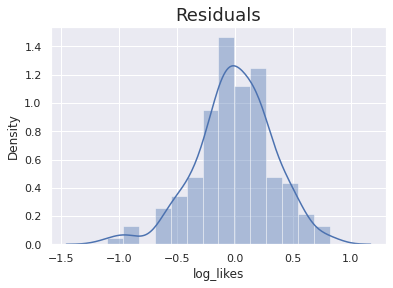

In [24]:
# To plot the residuals 
sns.distplot(y_train-y_hat)
plt.title("Residuals", size=18)

# From the regression assumption of zero mean, we know that the error must be normally distributed with a mean of 0 

In [25]:
# To calculate the R squared 
reg.score(x_train, y_train)
# from this we can see that our model is explaining 92% variability of the data 

0.9203177606178327

In [26]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

# our results means that as the views increase, there will be an increase in likes 
# and as the shares increase there will be a decrease in likes
# this doesnt really make sense and there is an obvious problem somewhere 


,Features,weights
0,log_shares,-0.015936
1,log_views,1.131793


### TESTING

(2.0, 10.0)

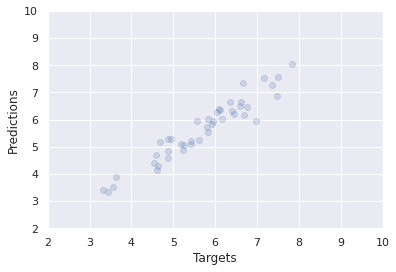

In [27]:
# we want to get the predicted values using the testing set 
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets")
plt.ylabel('Predictions')
plt.xlim(2, 10 )
plt.ylim(2, 10)

In [28]:
# we can create a table for our predictions 
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions']) #np.exp return the exponential of x
df_pf.head()

,Predictions
0,386.381313
1,187.087542
2,251.123572
3,30.713393
4,48.732354


In [29]:
# to reset the  index of y_test
y_test = y_test.reset_index(drop= True)
y_test

0     5.950643
1     5.609472
2     5.837730
3     3.332205
4     3.637586
5     5.834811
6     4.543295
7     6.618739
8     7.829630
9     7.170888
10    6.109248
11    6.682109
12    6.095825
13    4.941642
14    5.429346
15    6.040255
16    5.916202
17    6.356108
18    5.252273
19    6.396930
20    4.644391
21    5.176150
22    6.767343
23    5.805135
24    5.429346
25    5.560682
26    4.595120
27    3.555348
28    4.867534
29    4.882802
30    6.584791
31    6.663133
32    4.605170
33    6.458338
34    7.487174
35    4.682131
36    7.360740
37    6.175867
38    6.983790
39    7.510431
40    3.433987
41    4.875197
42    5.241747
Name: log_likes, dtype: float64

In [30]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,386.381313,384.0
1,187.087542,273.0
2,251.123572,343.0
3,30.713393,28.0
4,48.732354,38.0
5,411.444296,342.0
6,81.111713,94.0
7,779.015882,749.0
8,3126.742158,2514.0
9,1850.758851,1301.0


In [31]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']
df_pf

,Predictions,Target,Residual
0,386.381313,384.0,-2.381313
1,187.087542,273.0,85.912458
2,251.123572,343.0,91.876428
3,30.713393,28.0,-2.713393
4,48.732354,38.0,-10.732354
5,411.444296,342.0,-69.444296
6,81.111713,94.0,12.888287
7,779.015882,749.0,-30.015882
8,3126.742158,2514.0,-612.742158
9,1850.758851,1301.0,-549.758851


In [32]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.describe()

,Predictions,Target,Residual,Difference%
count,43.000000,43.000000,43.000000,43.000000
mean,513.987567,513.930233,-0.057334,25.541478
std,621.544740,554.651388,255.234472,19.288120
min,28.160287,28.000000,-748.358199,0.620133
25%,142.624015,131.500000,-64.484140,9.134762
50%,348.025959,342.000000,10.044308,24.373196
75%,584.727764,681.000000,60.985420,35.377306
max,3126.742158,2514.000000,807.159298,95.575760
